In [1]:
import os
# os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/home/gonzalo/Downloads/ml4cc-general-access_request_pays.json"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/home/gonzalo/Downloads/nema-floodmapper-2022.json"
os.environ["GS_USER_PROJECT"] = "nema-floodmapper-2022"

Load the existing AoIs for the current activation

In [2]:
from ml4floods.data import utils

aois = utils.read_geojson_from_gcp('gs://ml4floods_nema/0_DEV/1_Staging/operational/NEMA001/aois.geojson')
aois

,name,geometry
0,AUTOAOI0000,"POLYGON ((152.79785 -29.46351, 153.00785 -29.4..."
1,AUTOAOI0001,"POLYGON ((152.79785 -29.26351, 153.00785 -29.2..."
2,AUTOAOI0002,"POLYGON ((152.79785 -29.06351, 153.00785 -29.0..."
3,AUTOAOI0003,"POLYGON ((152.79785 -28.86351, 153.00785 -28.8..."
4,AUTOAOI0004,"POLYGON ((152.79785 -28.66351, 153.00785 -28.6..."
5,AUTOAOI0005,"POLYGON ((152.99785 -29.46351, 153.20785 -29.4..."
6,AUTOAOI0006,"POLYGON ((152.99785 -29.26351, 153.20785 -29.2..."
7,AUTOAOI0007,"POLYGON ((152.99785 -29.06351, 153.20785 -29.0..."
8,AUTOAOI0008,"POLYGON ((152.99785 -28.86351, 153.20785 -28.8..."
9,AUTOAOI0009,"POLYGON ((152.99785 -28.66351, 153.20785 -28.6..."


## Load available satellite data from an AoI

In [3]:
from ml4floods.data.ee_download import process_metadata
import pandas as pd

path_to_aois = "gs://ml4floods_nema/0_DEV/1_Staging/operational/NEMA001/"

aoi = "AUTOAOI0011"

path_s2info = os.path.join(path_to_aois, aoi, "S2/s2info.csv")
path_landsatinfo = os.path.join(path_to_aois, aoi, "Landsat/landsatinfo.csv")
metadata_s2 = process_metadata(path_s2info)
metadata_l89 = process_metadata(path_landsatinfo)

metadata_s2["satellite"] = "S2"
metadata_l89["satellite"] = "Landsat"
metadata = pd.concat([metadata_s2, metadata_l89], ignore_index=True)
metadata

,system:time_start,valids,cloud_probability,datetime,index_image_collection,names2file,s2available,satellite
0,1.660435e+12,1.000000,0.050954,2022-08-13 23:55:05.439000+00:00,0,2022-08-13,False,S2
1,1.660867e+12,1.000000,0.041917,2022-08-18 23:54:55.043000+00:00,1,2022-08-18,False,S2
2,1.661299e+12,1.000000,0.087321,2022-08-23 23:55:05.751000+00:00,2,2022-08-23,True,S2
3,1.661731e+12,1.000000,0.762606,2022-08-28 23:54:53.680000+00:00,3,2022-08-28,True,S2
4,1.660952e+12,0.184809,0.001013,2022-08-19 23:37:04.622500+00:00,0,2022-08-19,False,Landsat
5,1.660175e+12,1.000000,0.189467,2022-08-10 23:43:01.501000+00:00,1,2022-08-10,False,Landsat
6,1.661557e+12,1.000000,0.383668,2022-08-26 23:43:03.549000+00:00,2,2022-08-26,True,Landsat
7,1.660261e+12,0.227312,1.000000,2022-08-11 23:36:43.018500+00:00,3,2022-08-11,False,Landsat
8,1.661643e+12,0.001203,0.502282,2022-08-27 23:36:58.663000+00:00,4,2022-08-27,False,Landsat
9,1.660866e+12,1.000000,0.000002,2022-08-18 23:42:44.287000+00:00,5,2022-08-18,False,Landsat


Notes:
* The table above shows all the images available between the first and the last date for each satellite source.
* This info was stored when we run the downloading script.
* If the image is available it will be stored in `os.path.join(path_to_aois, aoi, satellite, f'{names2file}.tif')`


In the following cell we show how to quickly viz the images that are in the bucket

gs://ml4floods_nema/0_DEV/1_Staging/operational/NEMA001/AUTOAOI0011/S2/2022-08-23.tif
gs://ml4floods_nema/0_DEV/1_Staging/operational/NEMA001/AUTOAOI0011/S2/2022-08-28.tif
gs://ml4floods_nema/0_DEV/1_Staging/operational/NEMA001/AUTOAOI0011/Landsat/2022-08-26.tif


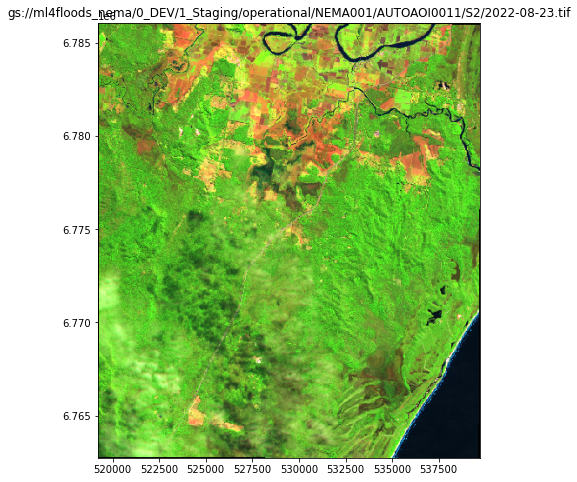

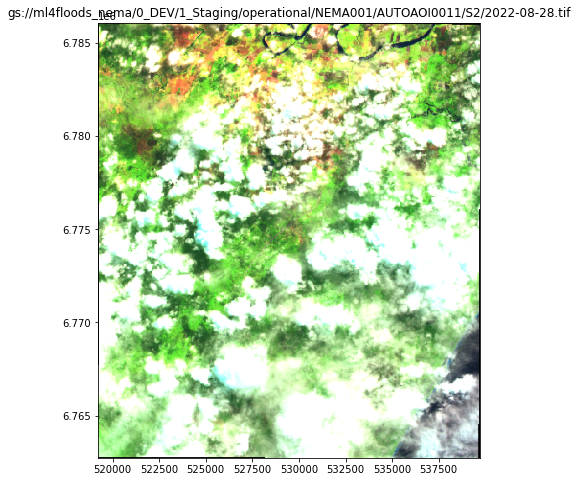

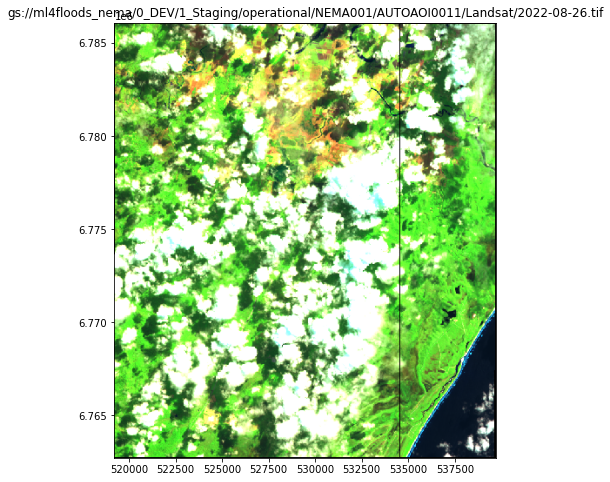

In [4]:
from ml4floods.visualization import plot_utils
import matplotlib.pyplot as plt

for row in metadata.itertuples():
    if row.s2available:
        path_s2_img = os.path.join(path_to_aois, aoi, row.satellite, f'{row.names2file}.tif')
        print(path_s2_img)
        fig, ax = plt.subplots(1,1,figsize=(8,8))
        plot_utils.plot_swirnirred_image(path_s2_img, size_read=500,ax=ax,collection_name=row.satellite)
        ax.set_title(path_s2_img)

## Data wrangling with rasters and vector files

In [7]:
import rasterio


with rasterio.open("gs://ml4floods_nema/0_DEV/1_Staging/operational/NEMA001/AUTOAOI0011/S2/2022-08-23.tif") as rst:
    print(rst.count)
    print(rst.shape)
    print(rst.transform)
    print(rst.descriptions)
    # data = rst.read()

15
(2333, 2049)
| 10.00, 0.00, 519220.00|
| 0.00,-10.00, 6786070.00|
| 0.00, 0.00, 1.00|
('B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA60', 'probability')


In [8]:
# data

In [9]:
import rasterio

with rasterio.open("gs://ml4floods_nema/0_DEV/1_Staging/operational/NEMA001/AUTOAOI0011/WF2_unet_rbgiswirs/S2/2022-08-23.tif") as rst:
    print(rst.count)
    print(rst.shape)
    print(rst.transform)
    print(rst.descriptions)
    data = rst.read()

1
(2333, 2049)
| 10.00, 0.00, 519220.00|
| 0.00,-10.00, 6786070.00|
| 0.00, 0.00, 1.00|
('invalid/land/water/cloud/trace',)


In [13]:
import numpy as np
np.unique(data)

array([0, 1, 2, 4], dtype=uint8)

In [20]:
import geopandas as gpd

data_vector = gpd.read_file("gs://ml4floods_nema/0_DEV/1_Staging/operational/NEMA001/AUTOAOI0011/WF2_unet_rbgiswirs_vec/S2/2022-08-23.geojson")
data_vector.explore()

In [24]:
data_vector

,id,class,geometry
0,0,area_imaged,"POLYGON ((519290.000 6786050.000, 522630.000 6..."
1,1,water,"POLYGON ((522920.000 6786000.000, 522960.000 6..."
2,2,water,"POLYGON ((524500.000 6786030.000, 524520.000 6..."
3,3,water,"POLYGON ((524520.000 6785780.000, 524520.000 6..."
4,4,water,"POLYGON ((524710.000 6785780.000, 524800.000 6..."
...,...,...,...
345,345,flood_trace,"POLYGON ((530740.000 6763280.000, 530800.000 6..."
346,346,flood_trace,"POLYGON ((531010.000 6763200.000, 531010.000 6..."
347,347,flood_trace,"POLYGON ((534620.000 6763350.000, 534650.000 6..."
348,348,flood_trace,"POLYGON ((531690.000 6763060.000, 531750.000 6..."


In [25]:
data_vector[data_vector["class"] != "area_imaged"].explore("class")

<AxesSubplot:>

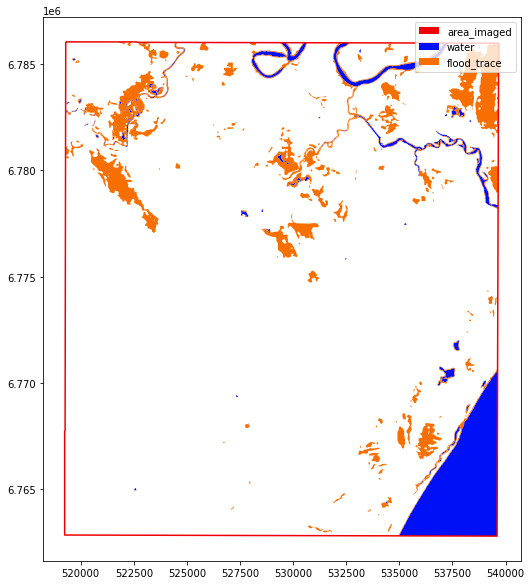

In [26]:
from ml4floods.visualization import plot_utils

plot_utils.plot_floodmap(data_vector)

In [14]:
with rasterio.open("gs://ml4floods_nema/0_DEV/1_Staging/operational/NEMA001/AUTOAOI0011/WF2_unet_rbgiswirs_cont/S2/2022-08-23.tif") as rst:
    print(rst.count)
    print(rst.shape)
    print(rst.transform)
    print(rst.descriptions)
    data = rst.read()

2
(2333, 2049)
| 10.00, 0.00, 519220.00|
| 0.00,-10.00, 6786070.00|
| 0.00, 0.00, 1.00|
('clear/cloud', 'land/water')


In [16]:
data.shape,data.dtype

((2, 2333, 2049), dtype('float32'))

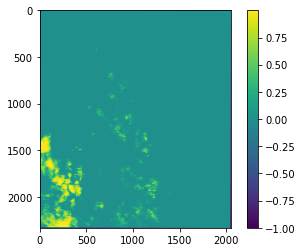

In [18]:
import matplotlib.pyplot as plt

plt.imshow(data[0])
plt.colorbar()

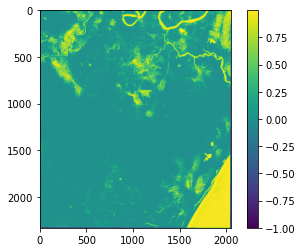

In [19]:
plt.imshow(data[1])
plt.colorbar()